<a href="https://colab.research.google.com/github/SarahMarquardt73/TumorRecurrence_MLModel/blob/main/ThyroidCancerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: Develop a machine learning model to predict the recurrence of tumors with high accuracy, precision, recall, and F1 score. Additionally, identify which features (X variables) contribute most significantly to the likelihood of recurrence (target variable Y).

## Import Packages/ Read CSV

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thyroid Cancer Project/filtered_thyroid_data.csv')

## Column Description

**Age** : Age of the patient (in years).

**Gender** : Patient's gender (Male or Female).

**Hx Radiotherapy** : History of prior radiotherapy (Yes or No).

**Adenopathy **: Presence of lymph node involvement (Yes or No).

**Pathology** : Type of thyroid cancer (e.g., Micropapillary).

**Focality** : Tumor focality (Uni-Focal or Multi-Focal).

**Risk **: Cancer risk classification (Low, Intermediate, High).

**T **: Tumor classification (T1, T2, etc.).

**N** : Lymph node classification (N0, N1, etc.).

**M** : Metastasis classification (M0, M1, etc.).

**Stage** : Cancer staging (Stage I, II, III, IV).

**Response** : Treatment response (Excellent, Indeterminate, etc.).

**Recurred** : Whether cancer recurred (Yes or No).

In [4]:
df = data.copy()

In [5]:
df.head()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [6]:
df.isnull().sum()

,0
Age,0
Gender,0
Hx Radiothreapy,0
Adenopathy,0
Pathology,0
Focality,0
Risk,0
T,0
N,0
M,0


There appears to be no null variables.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              383 non-null    int64 
 1   Gender           383 non-null    object
 2   Hx Radiothreapy  383 non-null    object
 3   Adenopathy       383 non-null    object
 4   Pathology        383 non-null    object
 5   Focality         383 non-null    object
 6   Risk             383 non-null    object
 7   T                383 non-null    object
 8   N                383 non-null    object
 9   M                383 non-null    object
 10  Stage            383 non-null    object
 11  Response         383 non-null    object
 12  Recurred         383 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.0+ KB


All object variable types except for age

Change the spelling to Radiotherapy

In [8]:
df['Hx Radiotherapy'] = df['Hx Radiothreapy']

In [9]:
df.drop(['Hx Radiothreapy'], axis=1)

,Age,Gender,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Hx Radiotherapy
0,27,F,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,No
1,34,F,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,No
2,30,F,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,No
3,62,F,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,No
4,62,F,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes,Yes
379,81,M,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,Yes
380,72,M,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,No
381,61,M,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes,Yes


## Column Explanation

In [10]:
df['Hx Radiotherapy'].unique()

array(['No', 'Yes'], dtype=object)

Radio Therapy is a cancer treatment that uses high-energy radiation—usually X-rays, gamma rays, or particle beams—to kill or damage cancer cells

In [11]:
df['Adenopathy'].unique()

array(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior'],
      dtype=object)

The "adenopathy" is where the lymph node has been found on the neck

In [12]:
df['Pathology'].unique()

array(['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell'],
      dtype=object)

Pathology is "Micropapillary," "Papillary," "Follicular," and "Hurthle cell" all refer to different histological subtypes—basically, what the cancer cells look like under a microscope and how they behave.

In [13]:
df['Focality'].unique()

array(['Uni-Focal', 'Multi-Focal'], dtype=object)

Uni Focality Only one single tumor, Multi focality is two or more tumors in the thyroid.

In [14]:
df['Risk'].unique()

array(['Low', 'Intermediate', 'High'], dtype=object)

​In the Thyroid Cancer Recurrence Dataset on Kaggle, the "Risk" column categorizes patients based on their likelihood of cancer recurrence after initial treatment. This classification helps clinicians assess prognosis and tailor follow-up care.​



T : Tumor classification (T1, T2, etc.).

N : Lymph node classification (N0, N1, etc.).

M : Metastasis classification (M0, M1, etc.).

Stage : Cancer staging (Stage I, II, III, IV).

Response : Treatment response (Excellent, Indeterminate, etc.).

Recurred : Whether cancer recurred (Yes or No).

## Questions To Keep In Mind

1️⃣ Are thyroid cancer recurrences more common in men or women?

2️⃣ How does age affect recurrence risk?

3️⃣ Can we predict recurrence based on tumor staging and pathology?

4️⃣ What is the relationship between treatment response and recurrence?

Independent Variables:
Dependent: Recurred (1 or 0)

## Analysis

Recurrences with Men and Women

Univariate Analysis

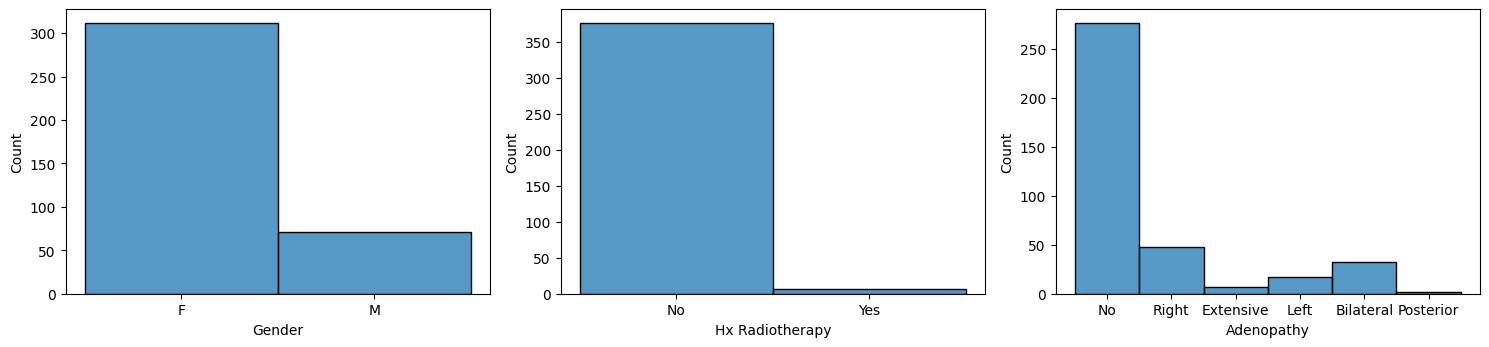

In [16]:
plt.figure(figsize=(15,10))

# numerical
num_features = ['Gender', 'Hx Radiotherapy', 'Adenopathy']

for i, feature in enumerate(num_features):
  plt.subplot(3, 3, i+1)
  sns.histplot(data=df, x=feature)

plt.tight_layout()

Gender is not proportionate. More women than men.

More people have not done radiotherapy.

Most people do not have Adenopathy, or swollen lymph nodes.



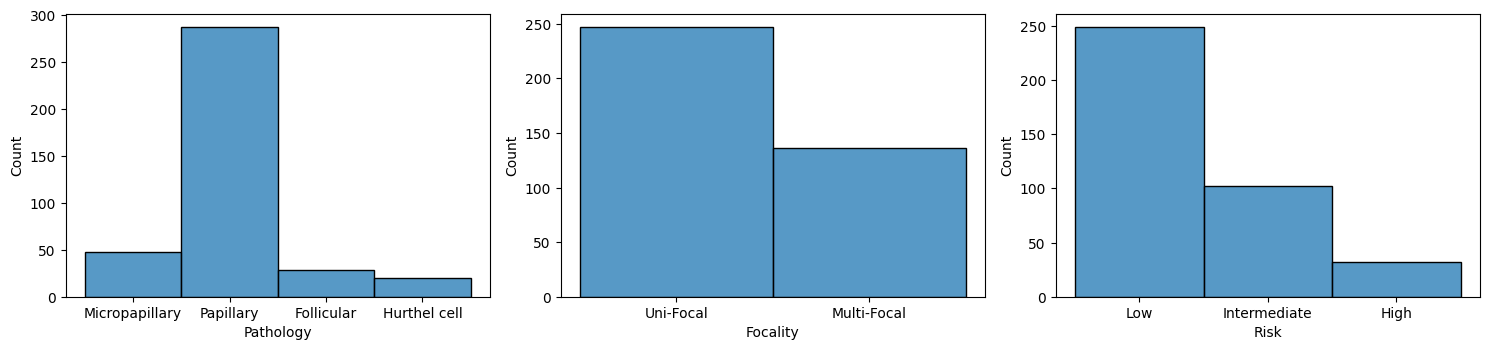

In [17]:
plt.figure(figsize=(15,10))

# numerical
num_features = ['Pathology', 'Focality', 'Risk']

for i, feature in enumerate(num_features):
  plt.subplot(3, 3, i+1)
  sns.histplot(data=df, x=feature)

plt.tight_layout()

Most people have a 'Papillary' pathology. According to the American Thyroid Association, The term papillary comes from the microscopic appearance of the tumor. When viewed under a microscope, the cancer cells form finger-like projections (called papillae). These structures are key to diagnosing this type of cancer.

Most people have Unifocal or just one occurence of tumors

Most people are at low risk.

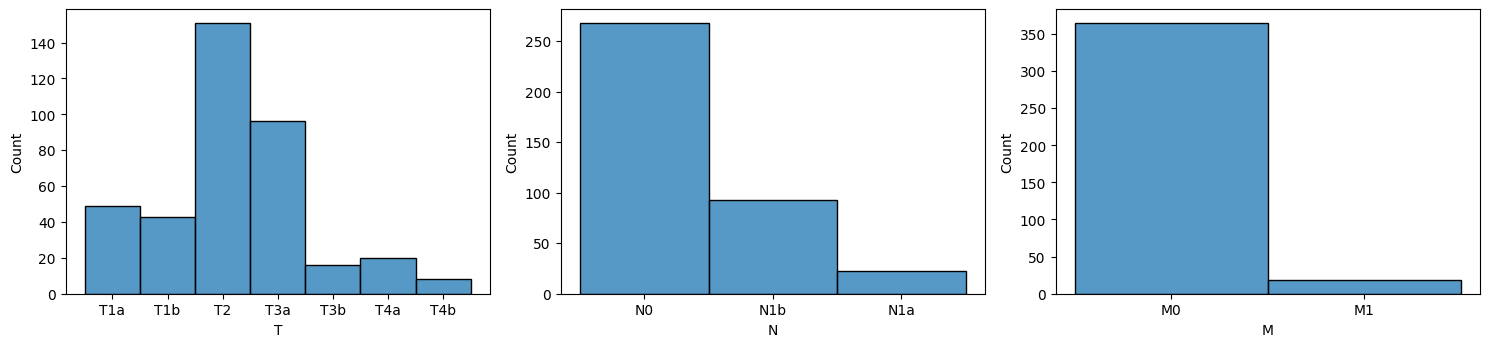

In [18]:
plt.figure(figsize=(15,10))

# numerical
num_features = ['T', 'N', 'M']

for i, feature in enumerate(num_features):
  plt.subplot(3, 3, i+1)
  sns.histplot(data=df, x=feature)

plt.tight_layout()

T:
Stage	Tumor Size	Location
T1a	≤ 1 cm	Inside thyroid
T1b	>1 cm to ≤2 cm	Inside thyroid
T2	>2 cm to ≤4 cm	Inside thyroid
T3+	>4 cm or extension beyond thyroid	May involve muscles or nearby tissues

It seems that most belong to the T2 category. T2 still has a good prognosis.


Stage	Description
N0	No regional lymph node metastasis
N1	Regional lymph node metastasis present
N1a	Metastasis to level VI or VII lymph nodes (central compartment):
• Pretracheal
• Paratracheal
• Prelaryngeal (Delphian node)
N1b	Metastasis to lateral cervical (levels I–V) or upper mediastinal lymph nodes

Seems like the majority of people do not have spread to the lymph nodes


Stage	Meaning
M0	No distant metastasis (cancer has not spread beyond the thyroid region/neck)
M1	Distant metastasis present (cancer has spread to distant organs—commonly lungs, bones, or less often, brain or liver)
Majority of people do not have spread.

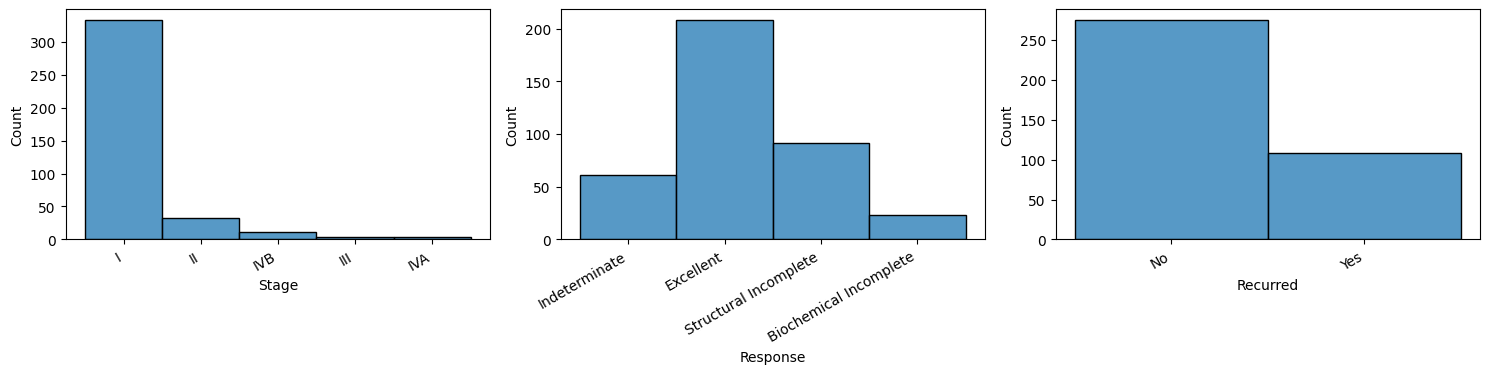

In [19]:
plt.figure(figsize=(15,10))

# numerical
num_features = ['Stage', 'Response', 'Recurred']

for i, feature in enumerate(num_features):
  plt.subplot(3, 3, i+1)
  sns.histplot(data=df, x=feature)
  plt.xticks(x=feature, rotation=30, ha='right')

plt.tight_layout()

Most people are in stage I, so the early stages of Thyroid Cancer

Most people have excellent responses to treatment

And finally most people have not had recurred.

In [20]:
# explore gender and recurrences
df.groupby('Gender')['Recurred'].value_counts()

Gender  Recurred
F       No          246
        Yes          66
M       Yes          42
        No           29
Name: count, dtype: int64

Are thyroid cancer recurrences more common in men or women?
- Overall, there are more women in this data set. Lets look at percents

In [21]:
# yes/women
w_yes = 66/(246+66)
#yes/overall
w_yes_overall = 66/383
#yes/men
m_yes = 42/(42+29)
#yes/overall
m_yes_overall = 42/383

In [22]:
w_yes

0.21153846153846154

In [23]:
w_yes_overall

0.17232375979112272

In [24]:
m_yes

0.5915492957746479

In [25]:
m_yes_overall

0.10966057441253264

Men have a much higher recurrence rate within their group (59%) compared to women (21%).

However, more women overall had recurrences (66 vs. 42), likely because there are more women in the dataset.

If you're comparing the risk per individual, men are more likely to experience a recurrence.

While more women had recurrences in absolute numbers, recurrence is more common in men when adjusted for group size. So yes, thyroid recurrences are proportionally more common in men.

<Axes: xlabel='Gender', ylabel='count'>

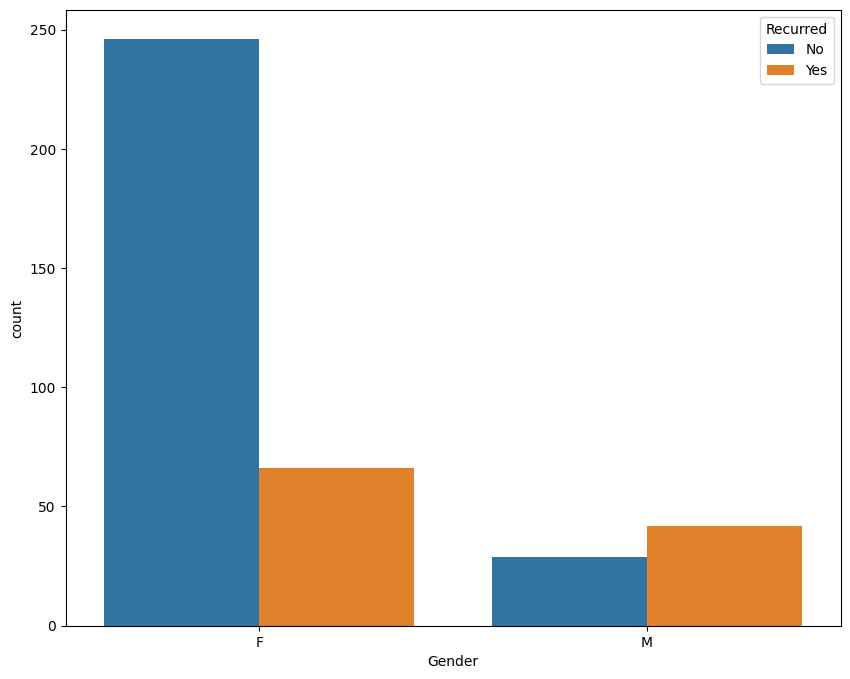

In [26]:
# lets visualize
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Gender', hue='Recurred')

Age and Recurrences

In [27]:
df['Age'].unique()

array([27, 34, 30, 62, 52, 41, 46, 51, 40, 75, 59, 49, 50, 76, 42, 44, 43,
       36, 70, 60, 33, 26, 37, 55, 31, 45, 20, 38, 29, 25, 21, 23, 24, 35,
       54, 22, 69, 28, 17, 73, 18, 39, 57, 66, 32, 47, 56, 63, 19, 67, 72,
       61, 68, 48, 81, 53, 58, 80, 79, 65, 15, 82, 71, 64, 78])

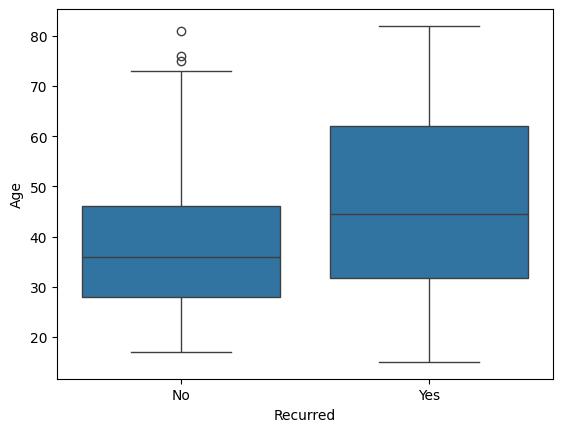

In [28]:
# Age independent.
# Recurrence (yes/no) (object variable)
sns.boxplot(data=df, y='Age', x='Recurred')
plt.show()

Seems that the older people have been marked as recurred

## Data Reprocessing

In [30]:
df['Recurred'] = df['Recurred'].apply(lambda x: 0 if x == 'No' else 1)

In [31]:
print(df['Recurred'].value_counts())

Recurred
0    275
1    108
Name: count, dtype: int64


In [32]:
# get dummies
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns)

In [34]:
# Step 1: Rename the misspelled columns
df.rename(columns={
    'Hx Radiothreapy_No': 'Hx Radiotherapy_No',
    'Hx Radiothreapy_Yes': 'Hx Radiotherapy_Yes'
}, inplace=True)

# Step 2: Drop the duplicate correctly spelled columns (originally columns 42 and 43)
df.drop(columns=['Hx Radiotherapy_No.1', 'Hx Radiotherapy_Yes.1'], errors='ignore', inplace=True)


In [35]:
# Convert boolean columns to integers (True = 1, False = 0)
df_numeric = df_encoded.astype(int)

In [36]:
# Create a correlation matrix
correlation_matrix = df_numeric.corr(method='pearson')  # You can also use 'spearman' or 'kendall'


## Correlation

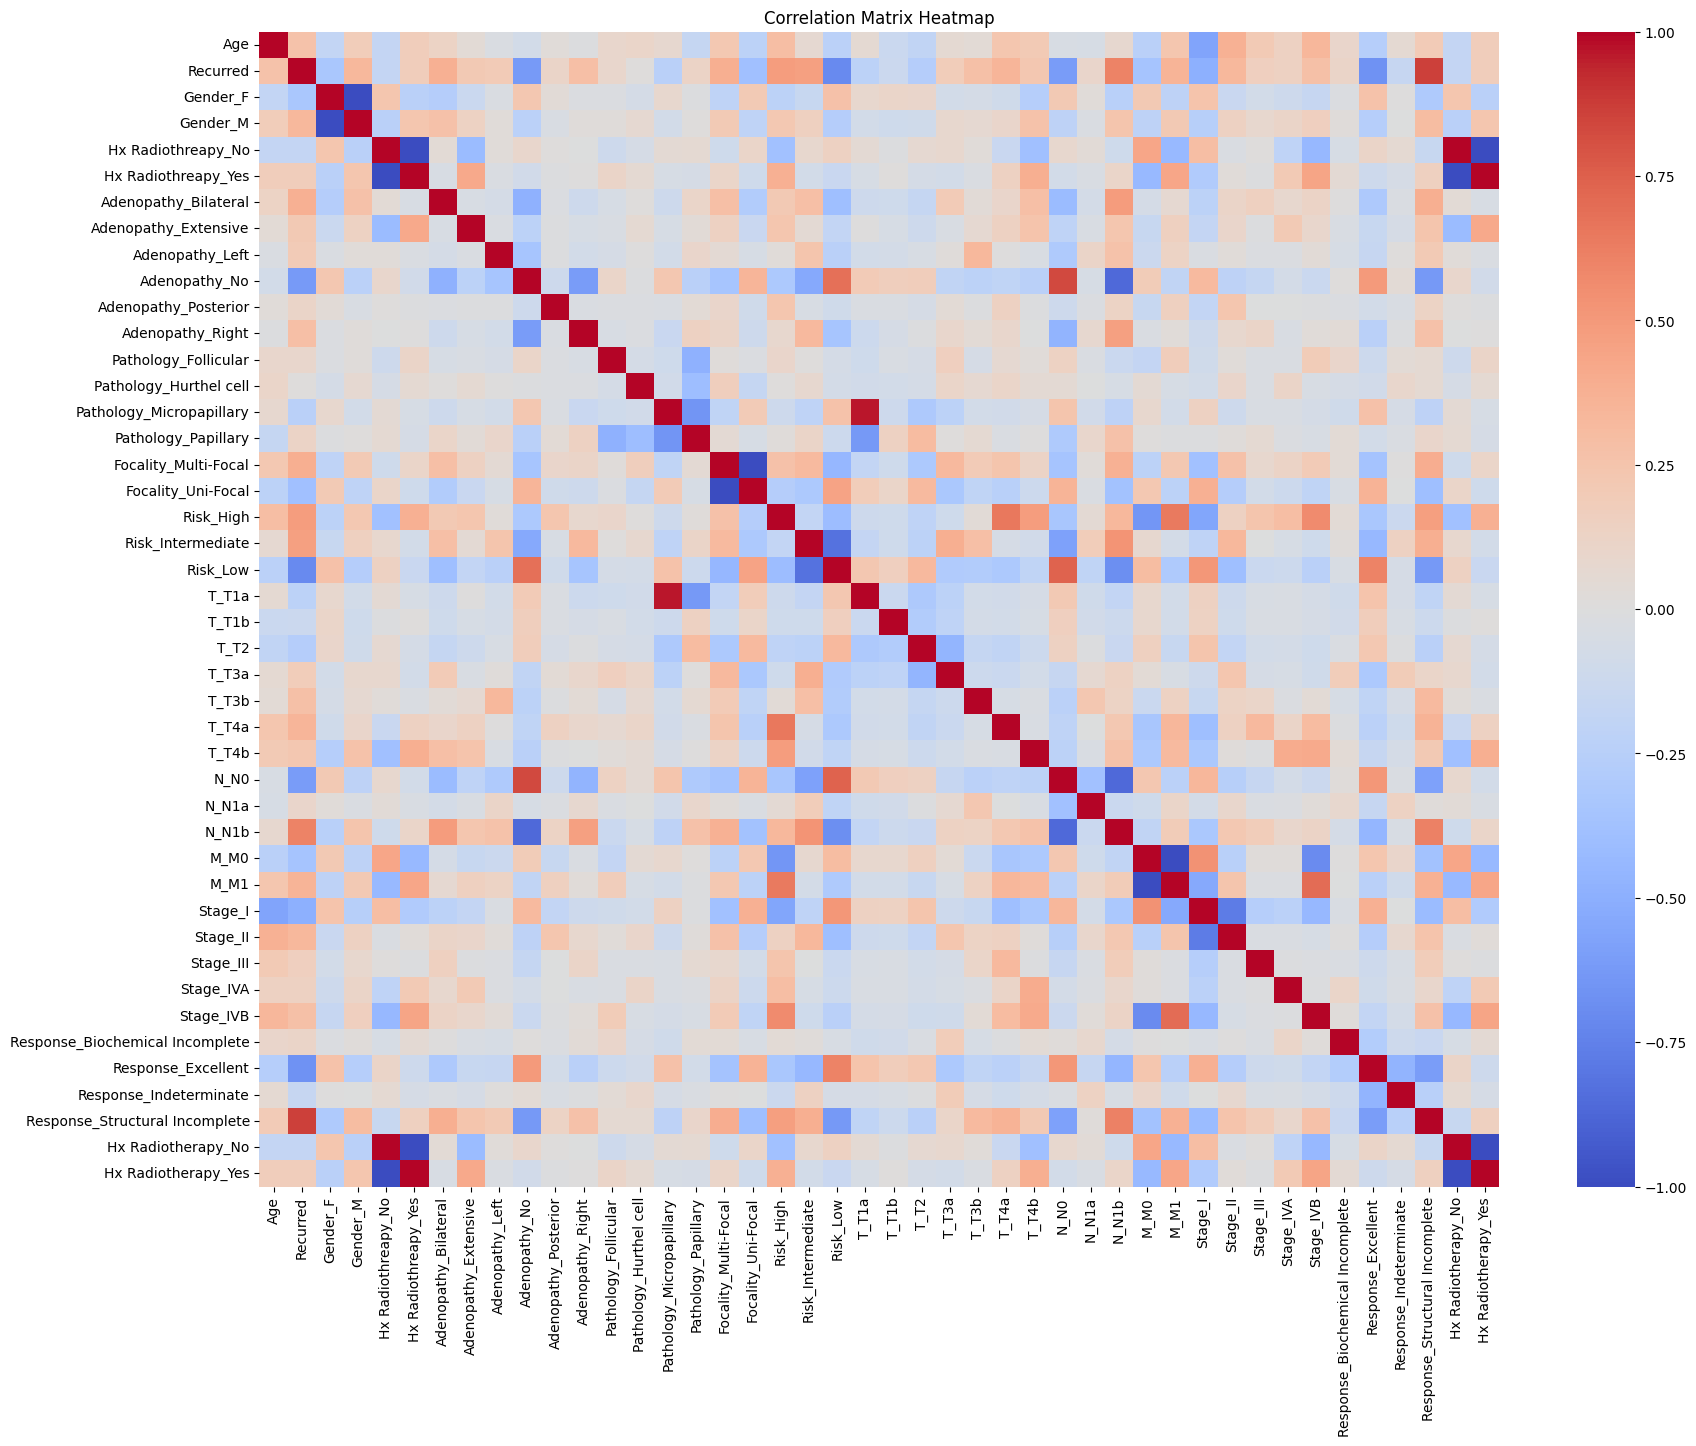

In [37]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Matrix Heatmap")
plt.show()

**Positive Correlation: ** T1_ta and Pathology_Micropapillary are positively correlated.
Explanation: a tumor that is <= to 1cm, and confined to the thyroid, are usually micropapillary.

Low risk and Adenopathy as no is positively correlated
Explanation: In most thyroid cancer guidelines (e.g. ATA, AJCC, NCCN), the absence of lymph node involvement is one of the key indicators of low-risk disease.

“Adenopathy” usually refers to enlarged lymph nodes, which in the context of thyroid cancer could mean metastatic spread.

So if a patient has no adenopathy, they are much more likely to be considered low risk—especially if the tumor is small and confined (like T1a or T1b).

**Negative Correlation:** N_N1b and adenopathy is no. N1b indicates confirmed spread of cancer to lateral cervical or upper mediastinal lymph nodes.

So if a patient is N1b, they definitely have adenopathy (lymph node involvement)—likely on imaging, clinical exam, or biopsy.
No distant metastasis → not likely to be in Stage IVB

Positive correlation (or correlation to a person recurring)
- Recurred (1.0 correlation)
- Response_Structural Incomplete: Used in thyroid cancer follow-up, and it refers to persistent or recurrent structural disease after initial treatment. Cancer not fully removed = more recurrence.
- N_N1b = The patient had cancer that spread to more distant lymph nodes beyond the central neck area. Increases recurrence.

Negative
- Adenopathy_No	-0.623965.. Enlargement or disease of lymph nodes is not present.
- Response_Excellent	-0.671568
- Risk_Low	-0.708266


In [97]:
df_encoded.corr()['Recurred'].sort_values(ascending=False)


,Recurred
Recurred,1.000000
Response_Structural Incomplete,0.863540
N_N1b,0.605927
Risk_High,0.481810
Risk_Intermediate,0.462566
Focality_Multi-Focal,0.383776
Adenopathy_Bilateral,0.376962
M_M1,0.354360
T_T4a,0.348473
Stage_II,0.335022


In [38]:
df_numeric.head()

,Age,Recurred,Gender_F,Gender_M,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Hx Radiotherapy_No,Hx Radiotherapy_Yes
0,27,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,30,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,62,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,62,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


I want to build an accurate model that correctly identifies based on certain characteristics, if a person will recurred.

Lets start by building a random forest

## Prepare Data

Split training data set and validation

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from imblearn.over_sampling import SMOTE

In [41]:
X = df_numeric.drop(columns=['Recurred'], axis=1)
y = df_numeric['Recurred']  # ← line break here

In [42]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [43]:
print(f"X Train: {X_train.shape}")
print(f"Y Train: {y_train.shape}")
print(f"X val: {X_val.shape}")
print(f"Y val: {y_val.shape}")

X Train: (306, 43)
Y Train: (306,)
X val: (77, 43)
Y val: (77,)


In [44]:
print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in the test set:")
print(y_val.value_counts(normalize=True))

Percentage of classes in the training set:
Recurred
0    0.718954
1    0.281046
Name: proportion, dtype: float64
Percentage of classes in the test set:
Recurred
0    0.714286
1    0.285714
Name: proportion, dtype: float64


In [45]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [46]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_resampled == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_resampled == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_resampled.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_resampled.shape))

Before OverSampling, count of label '1': 86
Before OverSampling, count of label '0': 220 

After OverSampling, count of label '1': 220
After OverSampling, count of label '0': 220 

After OverSampling, the shape of train_X: (440, 43)
After OverSampling, the shape of train_y: (440,) 



created new data points using smote. The minority before smote was 86, now that number has increased to 220

## Lets start building models

## Decision Tree 1

In [47]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix)

In [48]:
# build decision tree
dtree1 = DecisionTreeClassifier(random_state=42)

# fit
dtree1.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [49]:
# classification model
def model_performance_classification(model, predictors, target):
  '''
  Model: type of model,
  Predictor: Independent,
  Target: Dependent'''

  #predicting using independent variable.
  pred = model.predict(predictors)

  accuracy = accuracy_score(target, pred)
  recall = recall_score(target, pred)
  precision = precision_score(target, pred)
  f1 = f1_score(target, pred)

  # build matrix
  df_perf = pd.DataFrame({"Accuracy": accuracy, "Recall": recall, "Precision": precision, "F1": f1}, index=[0])
  return df_perf

In [50]:
def get_confusion_matrix(model, predictors, target):
  '''
  Model: type of model,
  Predictor: Independent,
  Target: Dependent'''

  y_pred = model.predict(predictors)

  # cm
  cm = confusion_matrix(target, y_pred)

  #labels
  # lets create labels for each cell with both count and percent
  labels = np.asarray(
      [
          ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
          for item in cm.flatten()
      ]
    ).reshape(2, 2)    # reshaping to a matrix

  plt.figure(figsize=(10,10))
  sns.heatmap(cm, annot=labels, fmt='')

  # add label
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

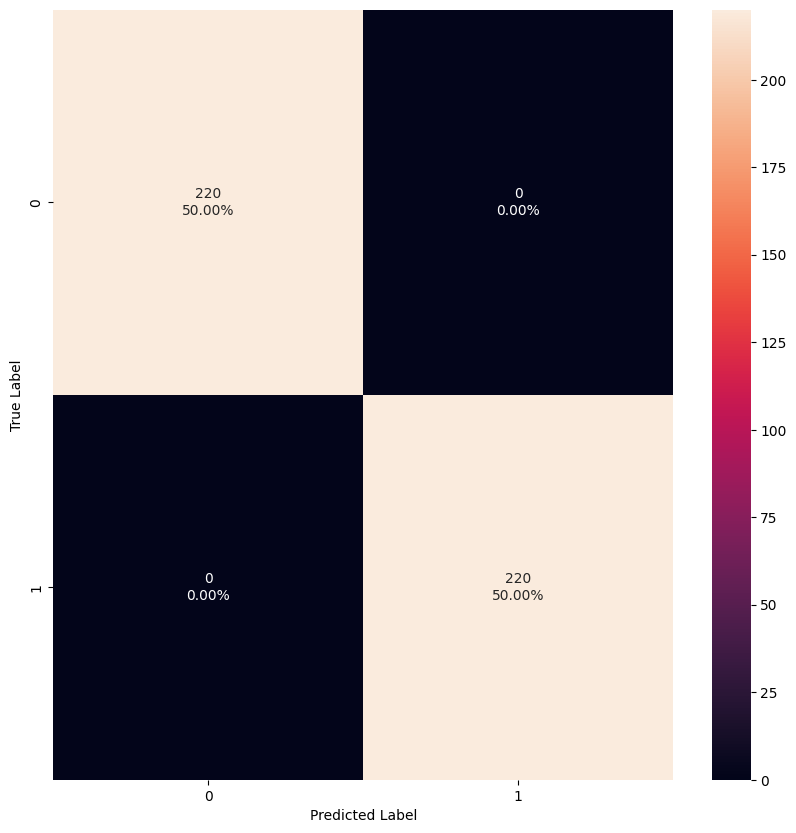

In [51]:
get_confusion_matrix(dtree1, X_train_resampled, y_train_resampled)

In [52]:
model_performance_classification(dtree1, X_train_resampled, y_train_resampled)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


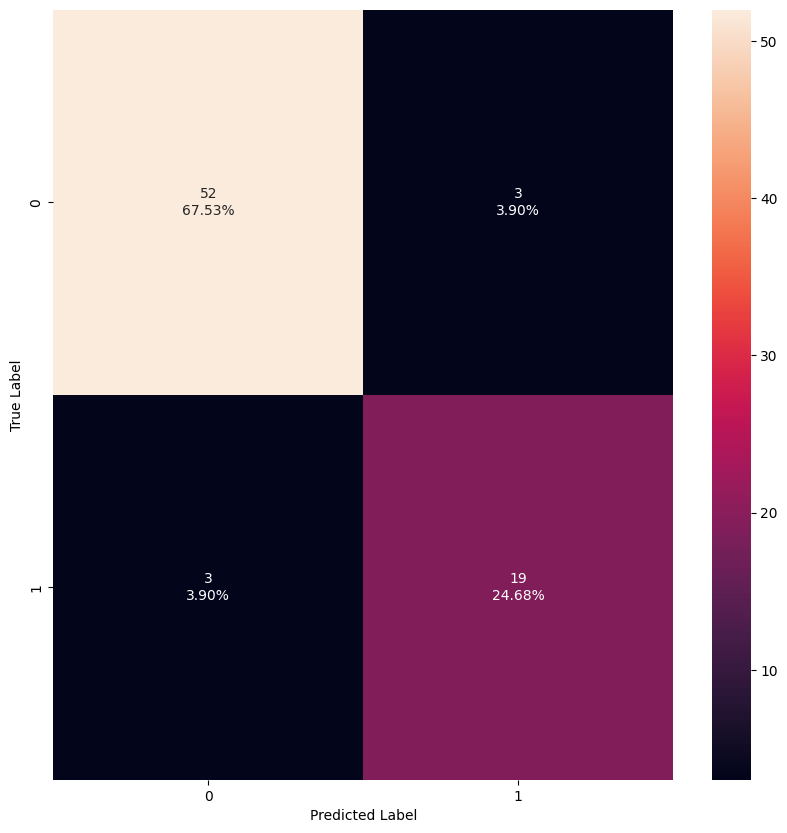

In [53]:
get_confusion_matrix(dtree1, X_val, y_val)

In [54]:
model_performance_classification(dtree1, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.922078,0.863636,0.863636,0.863636


92% accuracy. Pretty good overall. The accuracy is lower indicating that the model is over sampled.

We want to limit a person being predicted as "0" when in that person will actually have a recurrence of cancer. Or if a person's original cancer came back after a persn was considered cancer free.

Recall: Of all the positives I predicted, how many were actually positive?
tp / (tp + fn)
Precision: Of all the actual positives, how many did I correctly find?
tp / (tp + fp)

['Age', 'Gender_F', 'Gender_M', 'Hx Radiothreapy_No', 'Hx Radiothreapy_Yes', 'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left', 'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right', 'Pathology_Follicular', 'Pathology_Hurthel cell', 'Pathology_Micropapillary', 'Pathology_Papillary', 'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High', 'Risk_Intermediate', 'Risk_Low', 'T_T1a', 'T_T1b', 'T_T2', 'T_T3a', 'T_T3b', 'T_T4a', 'T_T4b', 'N_N0', 'N_N1a', 'N_N1b', 'M_M0', 'M_M1', 'Stage_I', 'Stage_II', 'Stage_III', 'Stage_IVA', 'Stage_IVB', 'Response_Biochemical Incomplete', 'Response_Excellent', 'Response_Indeterminate', 'Response_Structural Incomplete', 'Hx Radiotherapy_No', 'Hx Radiotherapy_Yes']


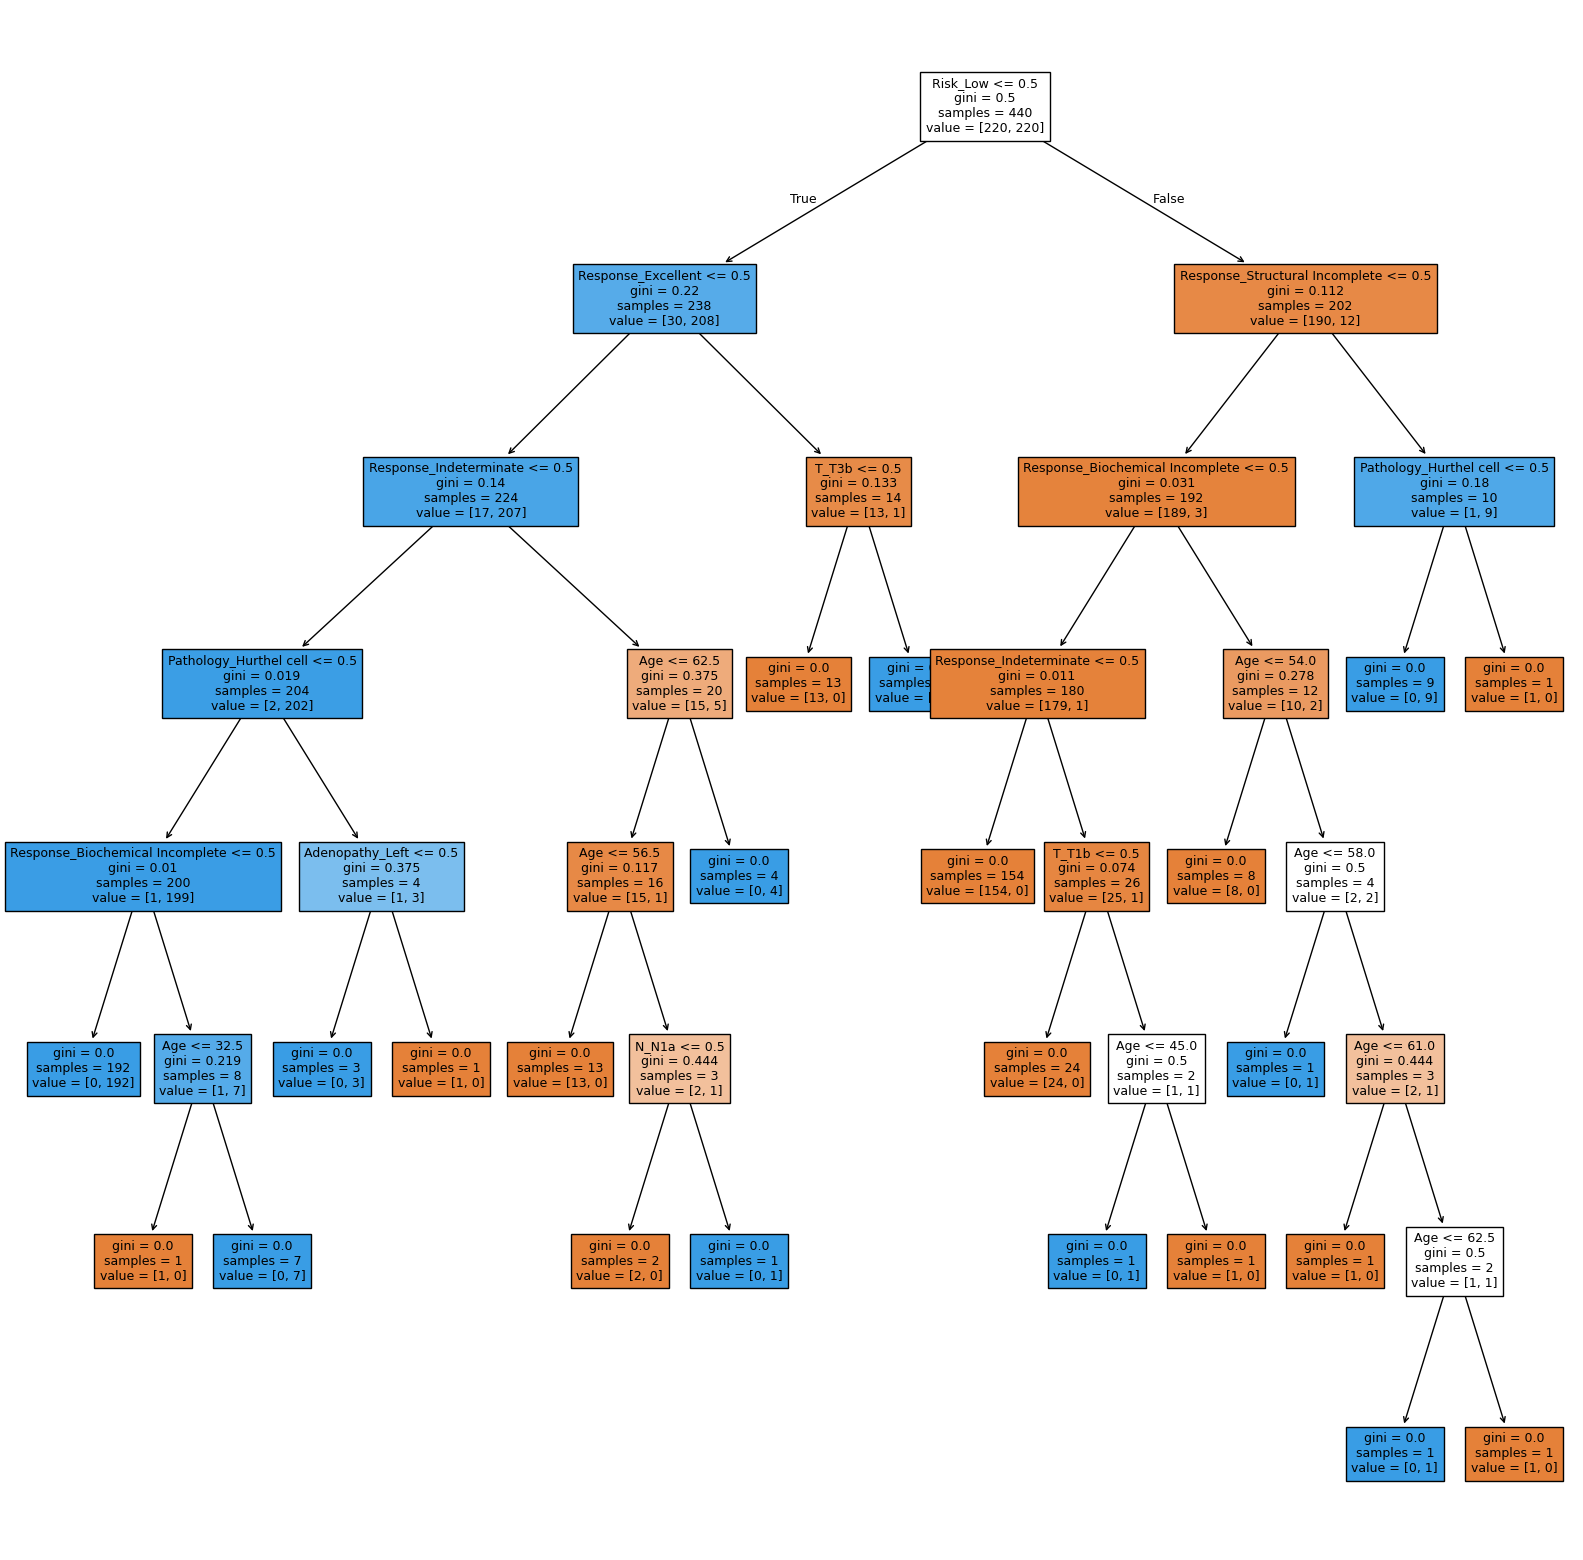

In [55]:
# make tree
features = list(X_train.columns)
print(features)

plt.figure(figsize=(20,20))

# plot decision tree
out = tree.plot_tree(
    dtree1,
    feature_names=features,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None
)

Since the model is overfitted, we want to prune the tree or remove the branches that offer no predictive insight.

## Prune Tree (Decision Tree 2)

First, lets try to prune the tree.

In [56]:
# prune tree using max_depth, number of nodes, min sample split value
max_depth_values = np.arange(2,11,2)
max_nodes_values = np.arange(10,51,10)
min_sample_split_values = np.arange(10,51,10)

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# loop through depth, nodes, sample split
for max_depth in max_depth_values:
  for max_nodes in max_nodes_values:
    for min_sample_split in min_sample_split_values:
      # initialize tree
      estimator = DecisionTreeClassifier(
          max_depth = max_depth,
          max_leaf_nodes=max_nodes,
          min_samples_split=min_sample_split,
          random_state=42)

      # fit model
      estimator.fit(X_train_resampled, y_train_resampled)

      # make prediction
      y_train_pred = estimator.predict(X_train_resampled)
      y_test_pred = estimator.predict(X_val)

      # recall score
      train_recall_score = recall_score(y_train_resampled, y_train_pred)
      val_recall_score = recall_score(y_val, y_test_pred)

      # score dif
      score_dif = abs(train_recall_score - val_recall_score)

      # best estimator
      if (score_dif < best_score_diff) & (val_recall_score > best_test_score):
        best_score_diff = score_dif
        best_test_score = val_recall_score
        best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")



Best parameters found:
Max depth: 2
Max leaf nodes: 10
Min samples split: 10
Best test recall score: 1.0


In [57]:
dtree2 = best_estimator

In [58]:
dtree2.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=np.int64(2), max_leaf_nodes=np.int64(10),
                       min_samples_split=np.int64(10), random_state=42)

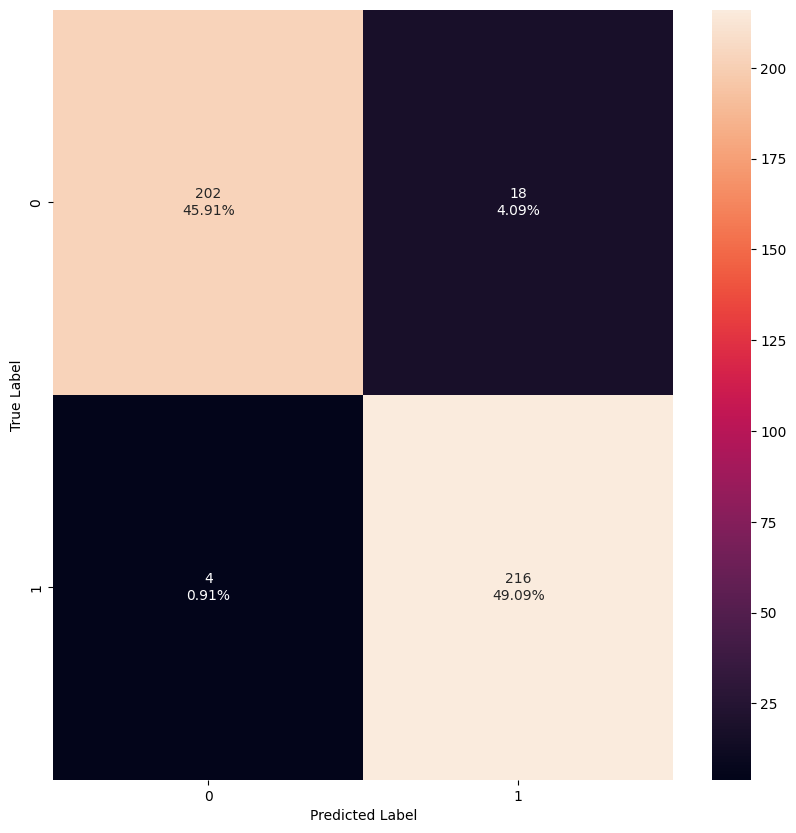

In [59]:
get_confusion_matrix(dtree2, X_train_resampled, y_train_resampled)

In [60]:
decision_tree_tune_perf_train = model_performance_classification(
    dtree2, X_train_resampled, y_train_resampled
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.95,0.981818,0.923077,0.951542


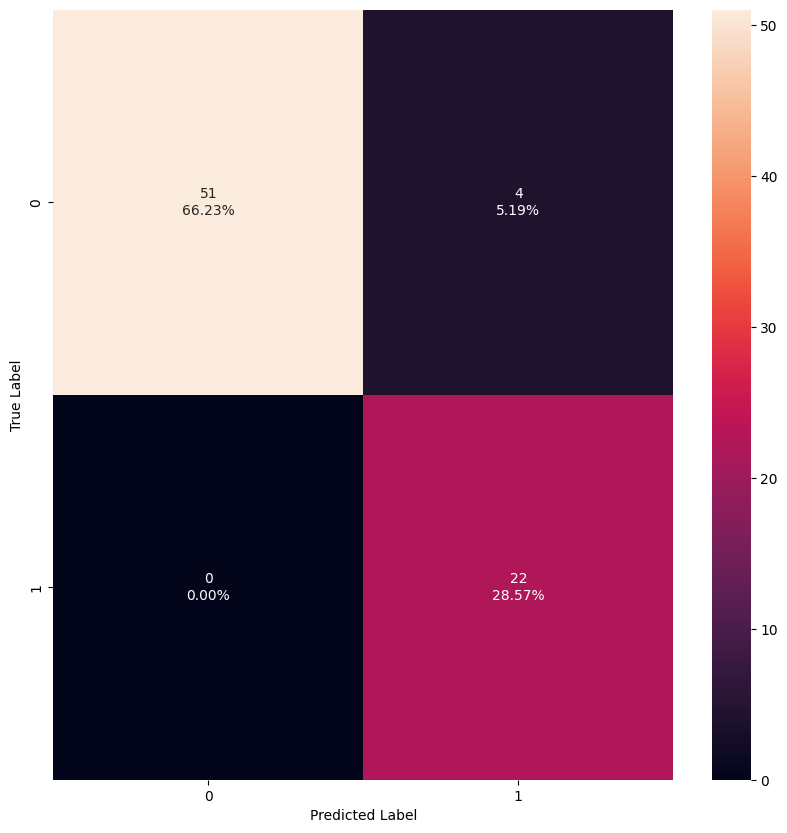

In [61]:
get_confusion_matrix(dtree2, X_val, y_val)

In [62]:
decision_tree_tune_perf_test = model_performance_classification(
    dtree2, X_val, y_val
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.948052,1.0,0.846154,0.916667


Accuracy between train and validation is really good. The precision is slightly lower.

['Age', 'Gender_F', 'Gender_M', 'Hx Radiothreapy_No', 'Hx Radiothreapy_Yes', 'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left', 'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right', 'Pathology_Follicular', 'Pathology_Hurthel cell', 'Pathology_Micropapillary', 'Pathology_Papillary', 'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High', 'Risk_Intermediate', 'Risk_Low', 'T_T1a', 'T_T1b', 'T_T2', 'T_T3a', 'T_T3b', 'T_T4a', 'T_T4b', 'N_N0', 'N_N1a', 'N_N1b', 'M_M0', 'M_M1', 'Stage_I', 'Stage_II', 'Stage_III', 'Stage_IVA', 'Stage_IVB', 'Response_Biochemical Incomplete', 'Response_Excellent', 'Response_Indeterminate', 'Response_Structural Incomplete', 'Hx Radiotherapy_No', 'Hx Radiotherapy_Yes']


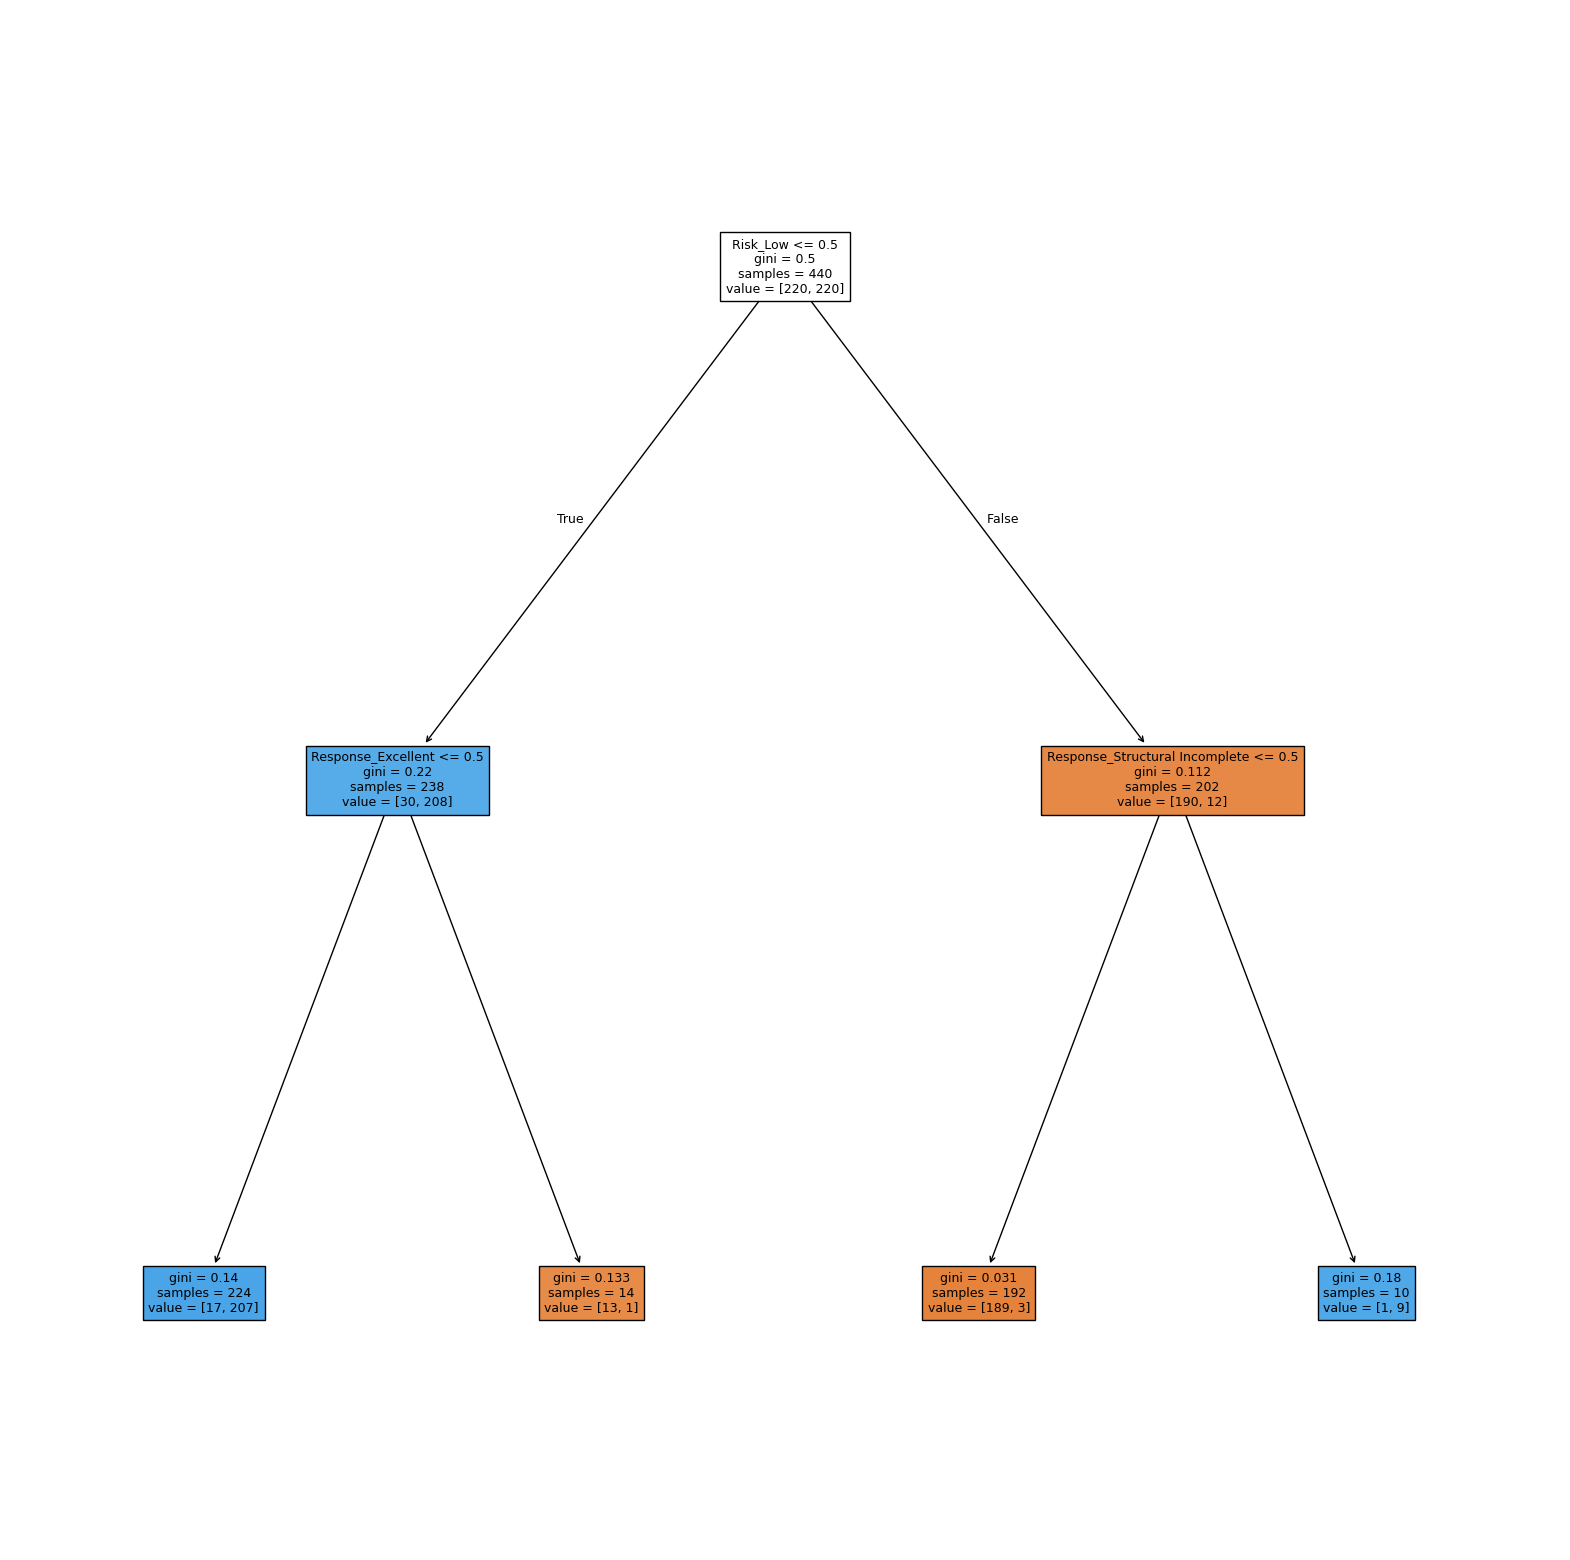

In [63]:
# make tree
features = list(X_train.columns)
print(features)

plt.figure(figsize=(20,20))

# plot decision tree
out = tree.plot_tree(
    dtree2,
    feature_names=features,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None
)

## Decision Tree 3

In [64]:
# Lets start off by defining parameters to control the size of the tree
max_depth_values = np.arange(2, 21)
max_leaf_nodes_values = np.arange(10, 101, 10)
min_samples_split_values = np.arange(2, 21)

# initialize variable
best_estimator = None
best_score_diff = float('inf')

# iterate over combinations of parameters
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train_resampled, y_train_resampled)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train_resampled)
            y_test_pred = estimator.predict(X_val)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train_resampled, y_train_pred)
            test_f1_score = f1_score(y_val, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator


In [65]:
# create best model
dtree3 = best_estimator

# fit the best estimated decision tree
dtree3.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=np.int64(3), max_leaf_nodes=np.int64(10),
                       min_samples_split=np.int64(15), random_state=42)

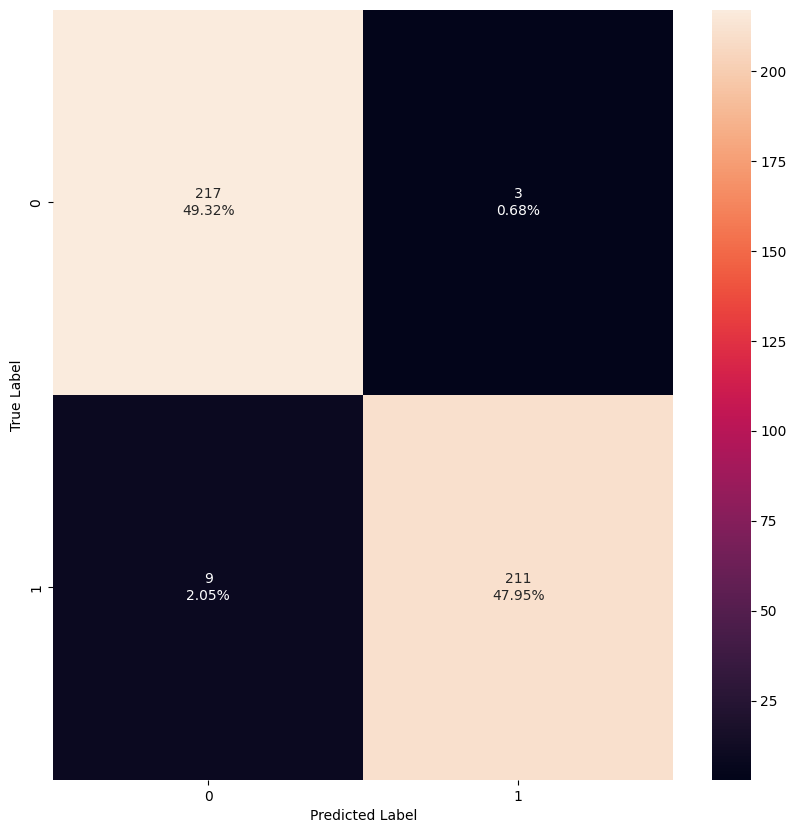

In [66]:
get_confusion_matrix(dtree3, X_train_resampled, y_train_resampled)

In [67]:
decision_tree_tune_perf_train = model_performance_classification(
    dtree3, X_train_resampled, y_train_resampled
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.972727,0.959091,0.985981,0.97235


Very good train scores.

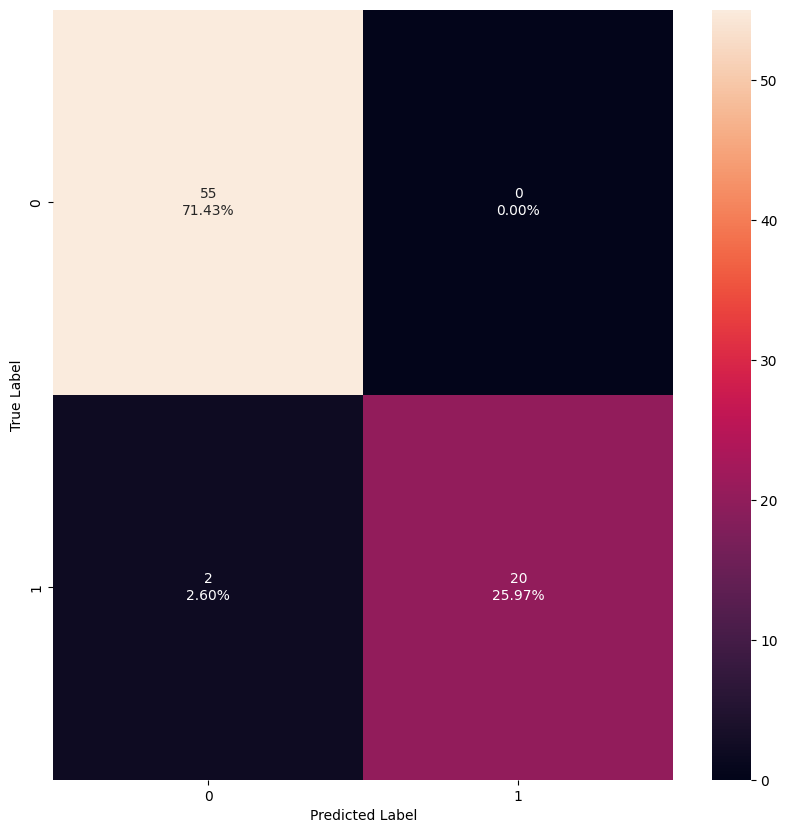

In [68]:
get_confusion_matrix(dtree3, X_val, y_val)

In [69]:
decision_tree_tune_perf_train = model_performance_classification(
    dtree3, X_val, y_val
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.974026,0.909091,1.0,0.952381


dtree3 is the best performing model. It performs similar to the train

['Age', 'Gender_F', 'Gender_M', 'Hx Radiothreapy_No', 'Hx Radiothreapy_Yes', 'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left', 'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right', 'Pathology_Follicular', 'Pathology_Hurthel cell', 'Pathology_Micropapillary', 'Pathology_Papillary', 'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High', 'Risk_Intermediate', 'Risk_Low', 'T_T1a', 'T_T1b', 'T_T2', 'T_T3a', 'T_T3b', 'T_T4a', 'T_T4b', 'N_N0', 'N_N1a', 'N_N1b', 'M_M0', 'M_M1', 'Stage_I', 'Stage_II', 'Stage_III', 'Stage_IVA', 'Stage_IVB', 'Response_Biochemical Incomplete', 'Response_Excellent', 'Response_Indeterminate', 'Response_Structural Incomplete', 'Hx Radiotherapy_No', 'Hx Radiotherapy_Yes']


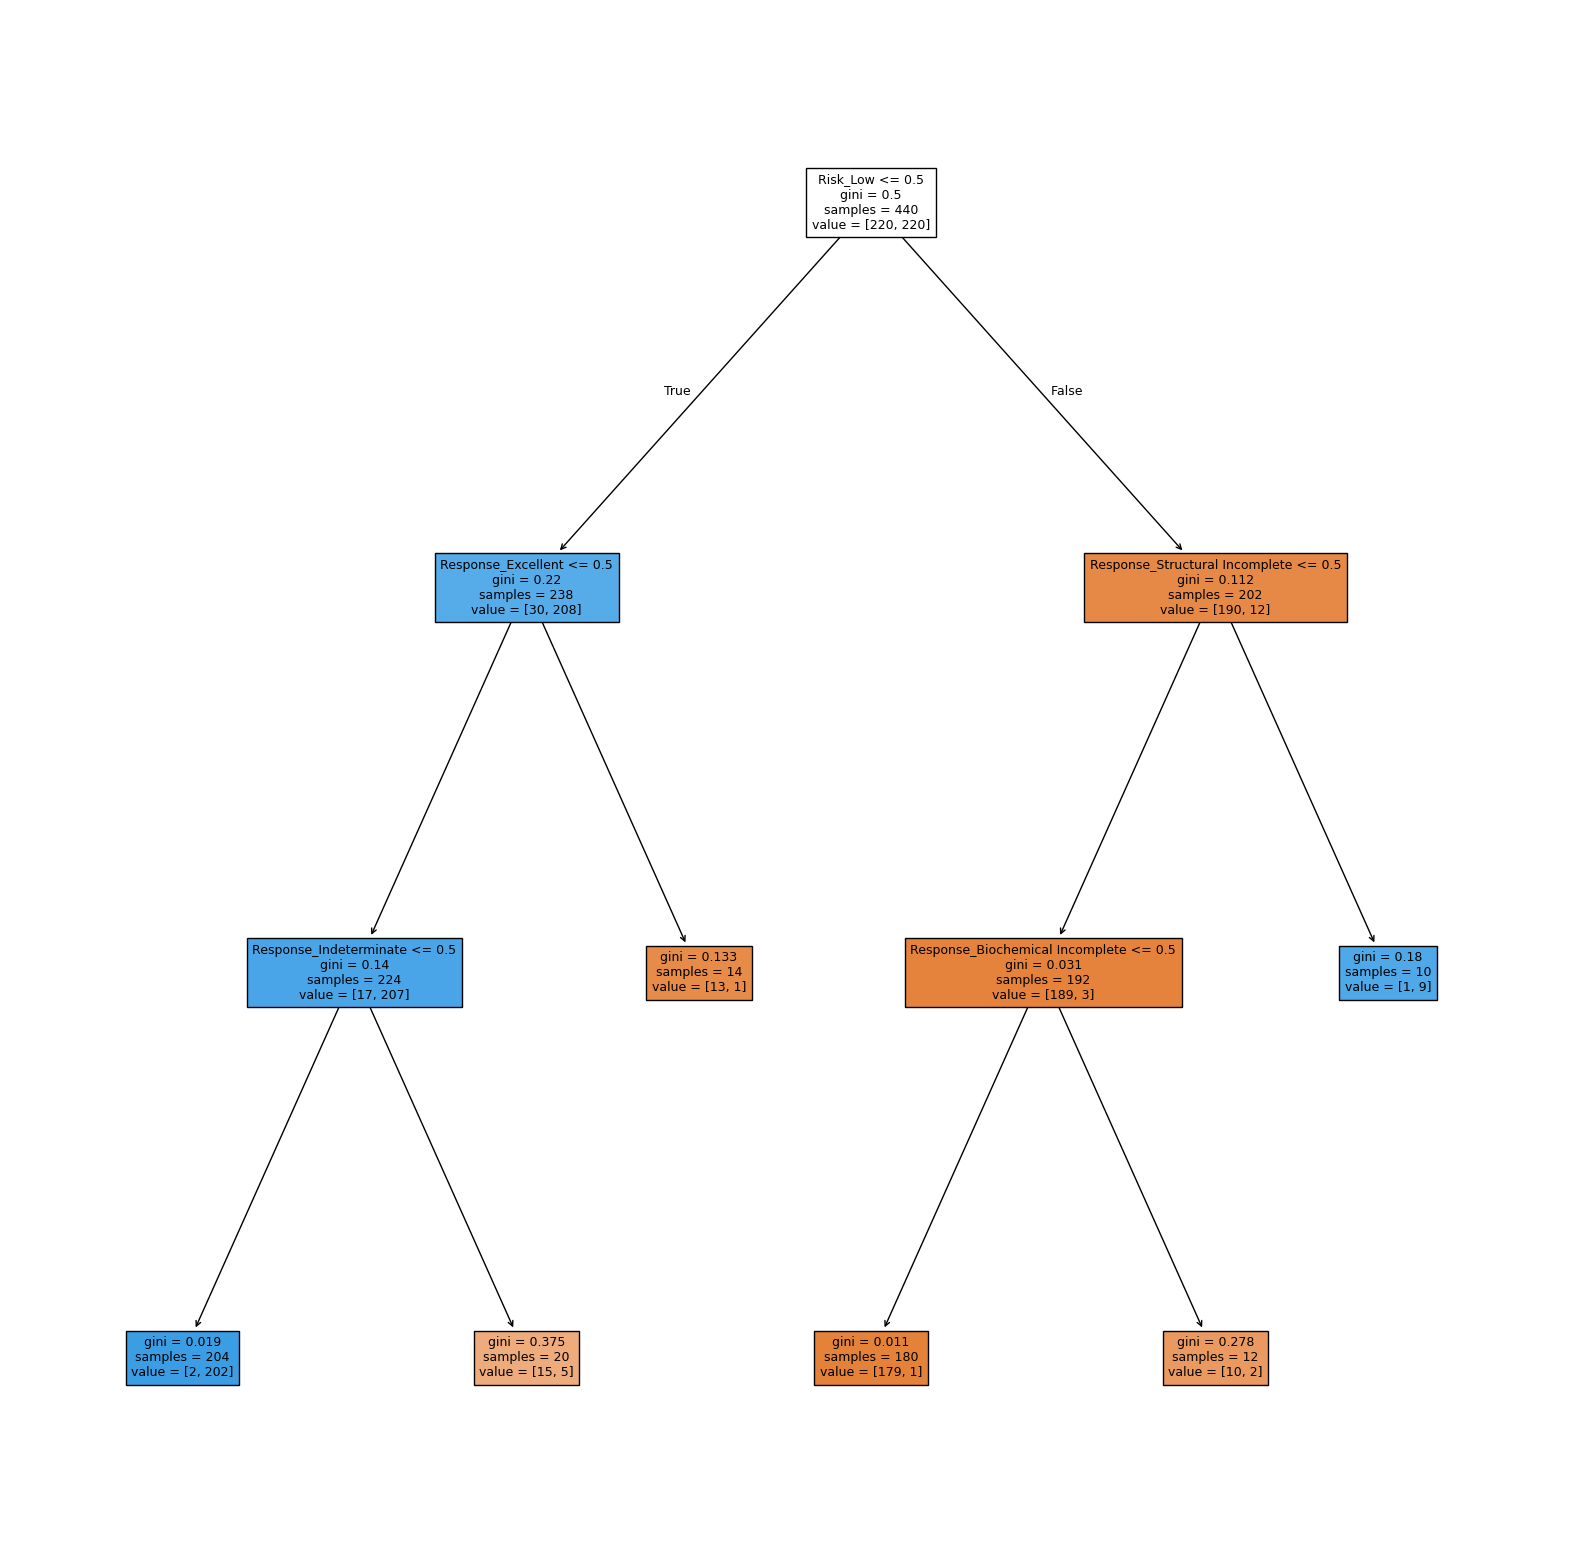

In [70]:
# make tree
features = list(X_train_resampled.columns)
print(features)

plt.figure(figsize=(20,20))

# plot decision tree
out = tree.plot_tree(
    dtree3,
    feature_names=features,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None
)

dtree 3 performs the best out of all models. The reason why it performs the best is because of the pruned depth of the tree, the amount of nodes, and the minimum sample split.

## Gradient Boosting

Gradient boosting is an algorith used in machine learning. How it works is it builds an initial "weak" model and then builds several strong models

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
# initialize the model
gboost_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=100, max_features=5)

In [73]:
gboost_model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, random_state=100)

In [74]:
model_performance_classification(gboost_model, X_train_resampled, y_train_resampled)

,Accuracy,Recall,Precision,F1
0,0.988636,0.986364,0.990868,0.98861


In [75]:
model_performance_classification(gboost_model, X_val, y_val)


,Accuracy,Recall,Precision,F1
0,0.987013,0.954545,1.0,0.976744


Very good scores between the Train and validation set.

Accuracy is about the same, the recall is slightly lower, the precision did better on the validation set. The f1 model did slightly lower.

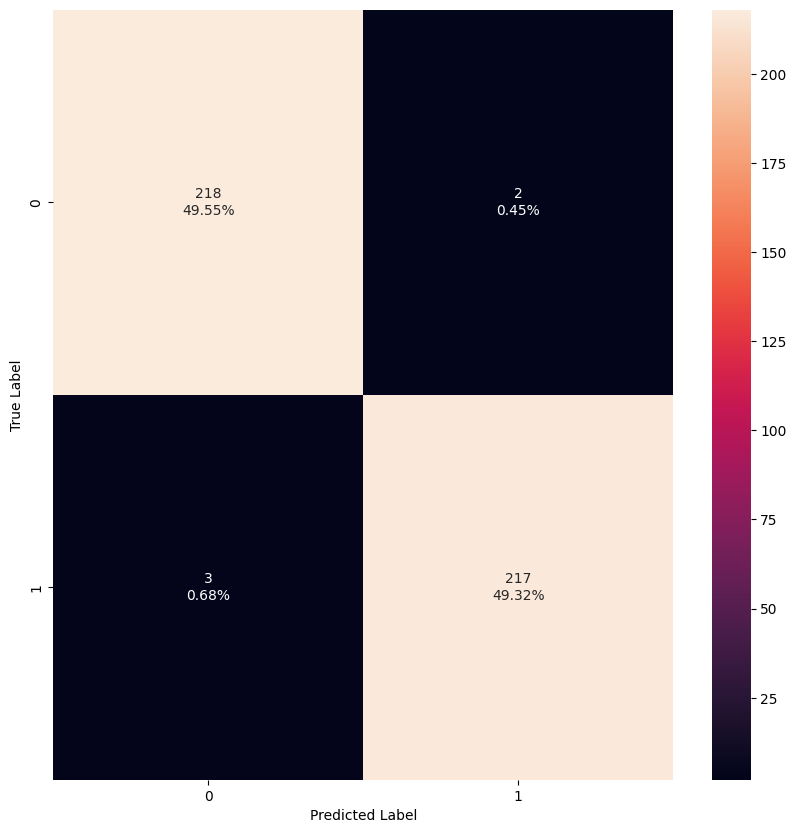

In [76]:
get_confusion_matrix(gboost_model, X_train_resampled, y_train_resampled)

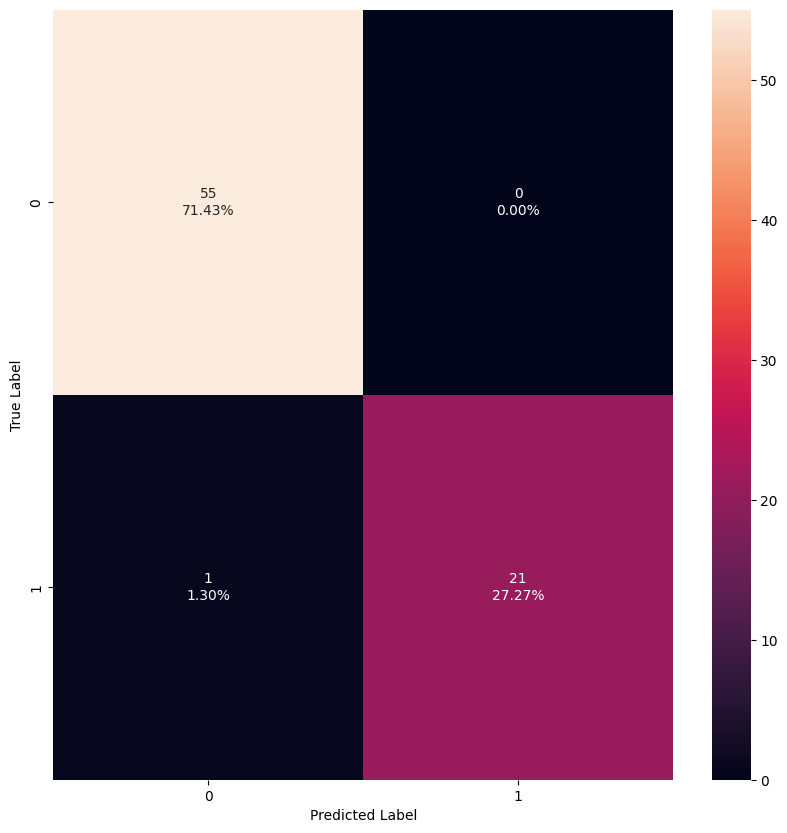

In [77]:
get_confusion_matrix(gboost_model, X_val, y_val)

Beautiful model. We want to mitigate how many people are being predicted as being "0" (or cancer free long term) when in reality, their cancer came back (1).. Out of all of the samples, only 1 made an appearance.

Statistically, gradient boosting did the best.

Since Gradient Boosting did great lets test out Adaptive Boost.

Adaptive Boosting focuses on the misclassified samples by updating sample weights. Whereas Gradient boosting uses residual errors from previous predictions.

## Adaptive Boost

In [78]:
from sklearn.ensemble import AdaBoostClassifier

In [79]:
# make shallow decision tree
base_learner = DecisionTreeClassifier(max_depth=1)

N_estimator: how many rounds of improvements do you want to make,

learning rate: How each weak learner contributes to the final prediction. So, if your learning rate is 0.1, each tree contributes just 10% of its output toward the final prediction.

Random State:

In [80]:
# base tree, n_estimator, random_state, learning_rate
adaboost_model = AdaBoostClassifier(estimator=base_learner, n_estimators=100, learning_rate=0.2, random_state=42)

In [81]:
adaboost_model.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.2, n_estimators=100, random_state=42)

In [82]:
model_performance_classification(adaboost_model, X_train_resampled, y_train_resampled)

,Accuracy,Recall,Precision,F1
0,0.981818,0.981818,0.981818,0.981818


In [83]:
model_performance_classification(adaboost_model, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.974026,0.954545,0.954545,0.954545


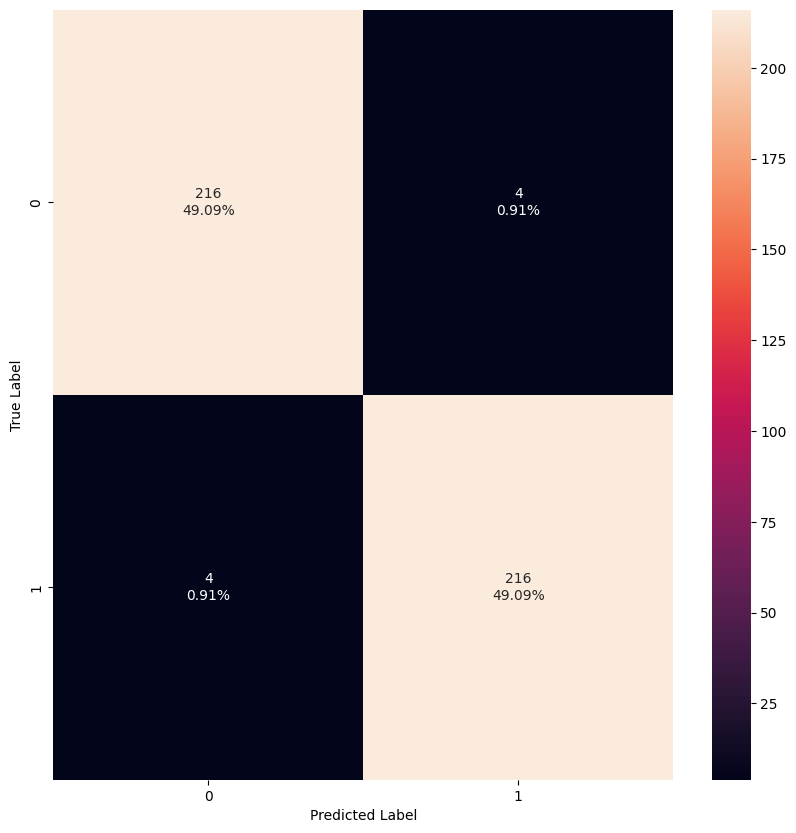

In [84]:
get_confusion_matrix(adaboost_model, X_train_resampled, y_train_resampled)

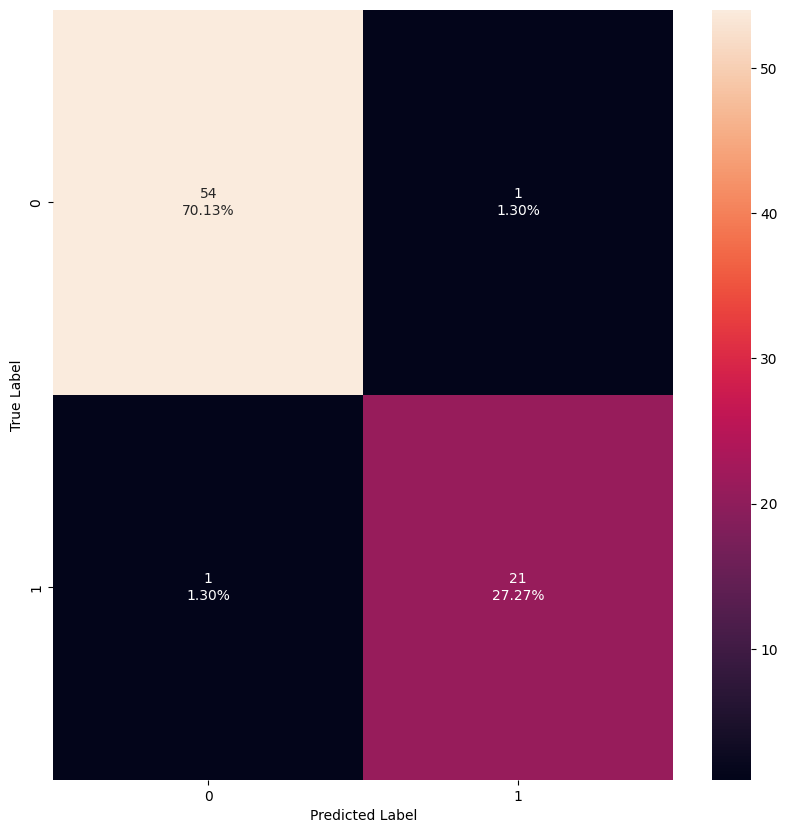

In [85]:
get_confusion_matrix(adaboost_model, X_val, y_val)

Gradient boost did slightly better than adaptive boost

Lets fit the final model and see what characteristics help predict the final model

## Final Fit (Test)

In [86]:
# Split into training and test sets
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [87]:

# Initialize the Gradient Boosting model
gboost_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    random_state=100,
    max_features=5
)

In [88]:
# Initialize the Gradient Boosting model
gboost_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    random_state=100,
    max_features=5
)

In [89]:
# Fit the model to training data
gboost_model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, random_state=100)

In [90]:
# Predict on test set
y_pred = gboost_model.predict(X_test)

In [91]:
model_performance_classification(gboost_model, X_train_resampled, y_train_resampled)

,Accuracy,Recall,Precision,F1
0,0.98366,0.953488,0.987952,0.970414


In [92]:
model_performance_classification(gboost_model, X_test, y_test)


,Accuracy,Recall,Precision,F1
0,0.961039,0.863636,1.0,0.926829


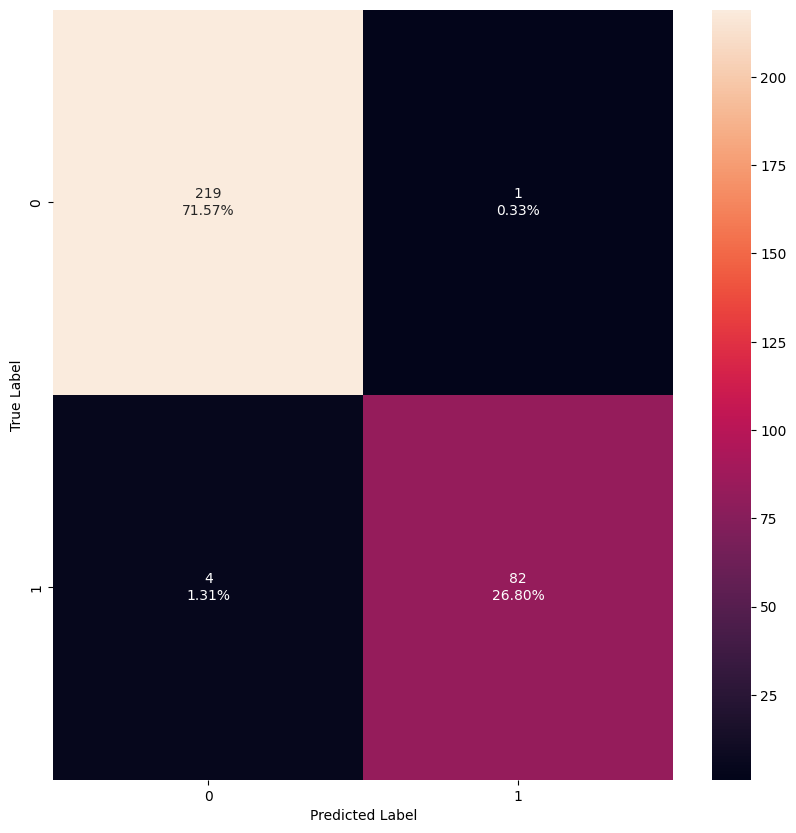

In [93]:
get_confusion_matrix(gboost_model, X_train_resampled, y_train_resampled)

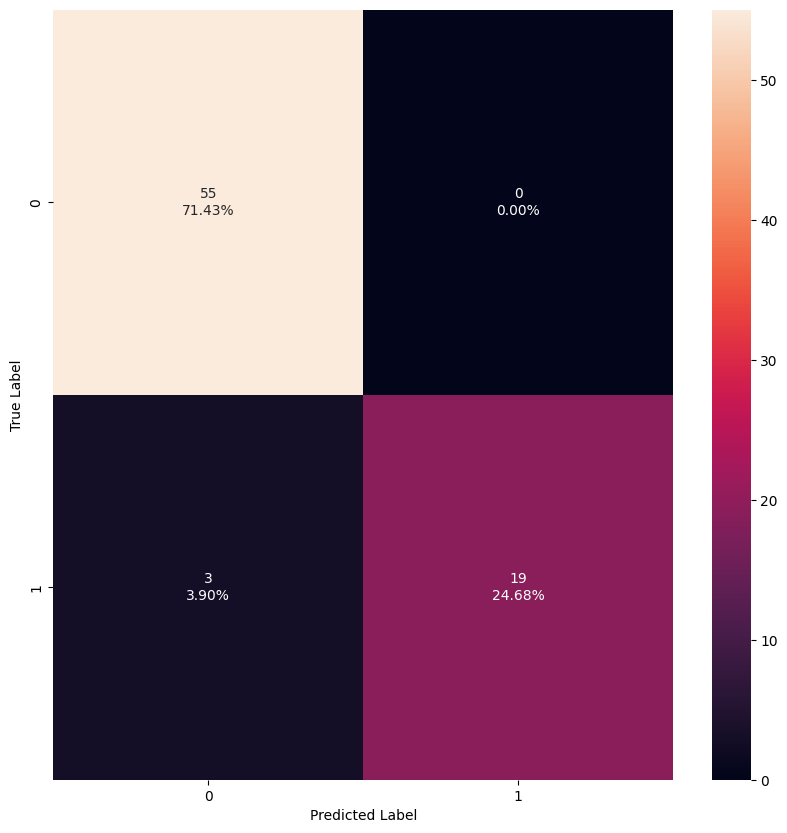

In [94]:
get_confusion_matrix(gboost_model, X_test, y_test)

## Key Characteristics

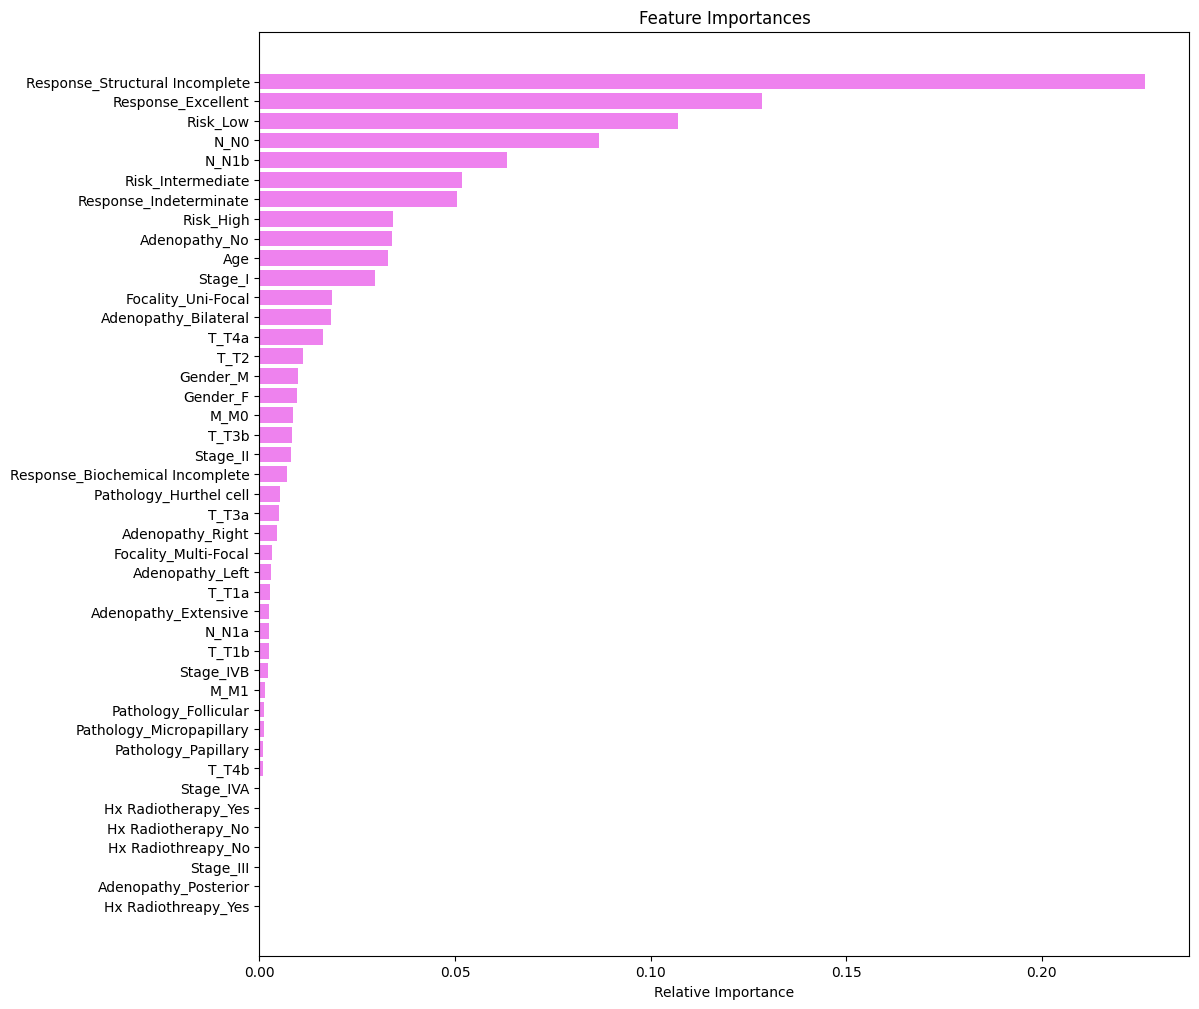

In [95]:
feature_names = X_train.columns
importances = gboost_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Top 5 most important:
1. Response_Structural_Incomplete: Likely indicates that patients with residual tumor (structural incomplete responses) are highly at risk for recurrence.
2. Response_Excellent: People with excellent responses are probably very unlikely to recur.
3. Risk_Low: Low risk is a strong indicator of non-recurrence
4. N_No / N_N1b: Lymph node involvement. “N1b” usually means spread to certain lymph nodes, which increases recurrence risk.
5. Risk Intermediate: Immediate risk is a middle ground predictor

## Closing Thoughts

Hospital Recommendations:
- Monitor the structural response being incomplete. This means that cancer cells remain despite treatment, meaninf they have not been removed or destroyed. These patients are at a higher risk for recurrence, and additional therapy or surveillance may be necessary.

- Excellent response means the patient is unlikely to have reoccurence. Clinicians can be reassured that their initial treatment was effective, though regular follow-up is still recommended.

- Pay close attention to lymph node involvement.
The presence of lymph node metastasis, especially to lateral or distant nodes (e.g., N1b), is associated with higher recurrence risk. These patients may benefit from more aggressive treatment and ongoing monitoring.
- The initial pathology is not as important so the healthcare providers should steer away from pathology.